In [2]:
import pickle
import os

import math 
import pandas_datareader as web # data reader (not working )
import yfinance as yf # data source (yahoo finance)
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential # Model
from keras.layers import Dense, LSTM  # (LSTM = Long Short Term Memory)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [3]:
# get the stock quote 
df = yf.download('NVDA', start='2012-01-01', end='2024-11-13')

# multi index to one index (ptoblem yfinance.download)
df.columns = df.columns.get_level_values(0)

# show the data 
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-03 00:00:00+00:00,0.321919,0.351000,0.360000,0.350250,0.357500,468044000
2012-01-04 00:00:00+00:00,0.325588,0.355000,0.356500,0.348000,0.351250,347372000
2012-01-05 00:00:00+00:00,0.337281,0.367750,0.369500,0.351750,0.353250,563548000
2012-01-06 00:00:00+00:00,0.333383,0.363500,0.367750,0.359250,0.367500,533252000
2012-01-09 00:00:00+00:00,0.333383,0.363500,0.370500,0.361000,0.363750,508244000
...,...,...,...,...,...,...
2024-11-06 00:00:00+00:00,145.610001,145.610001,146.490005,141.960007,142.960007,242043900
2024-11-07 00:00:00+00:00,148.880005,148.880005,148.929993,146.169998,146.389999,207323300
2024-11-08 00:00:00+00:00,147.630005,147.630005,149.770004,146.259995,148.770004,175665800


In [4]:
# get the number of rows and columns in the data set
df.shape

(3237, 6)

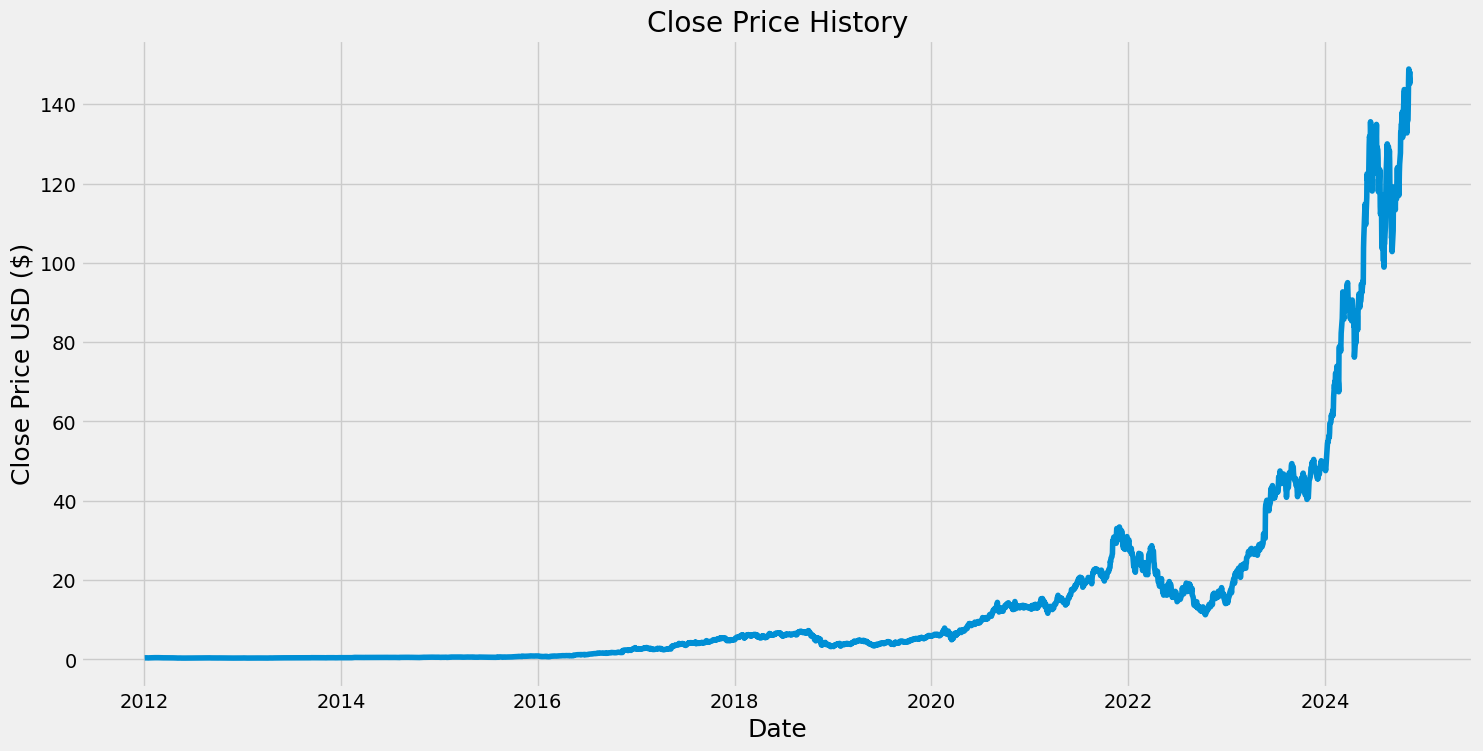

In [5]:
# visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel("Date", fontsize=18) 
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [6]:
print(df.columns)

# create new dataframe with only the close column
data = df.filter(['Close'])
# convert the dataframe to a numpy array 
dataset = data.values
# get the number of rows 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len


Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


2590

In [7]:
# scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[4.47523686e-04],
       [4.74442255e-04],
       [5.60245656e-04],
       ...,
       [9.91587902e-01],
       [9.75638493e-01],
       [9.96029412e-01]])

In [8]:
# create the training data set 
# create the scaled training data set 
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61 : 
        print(x_train)
        print(y_train)
        print()

[array([0.00044752, 0.00047444, 0.00056025, 0.00053164, 0.00053164,
       0.00052155, 0.00047276, 0.00045762, 0.00039537, 0.00036004,
       0.00043743, 0.00049968, 0.00047781, 0.00054342, 0.00059894,
       0.0005838 , 0.00056025, 0.00059389, 0.00057539, 0.00057034,
       0.00059726, 0.00069147, 0.00074699, 0.00072681, 0.00073353,
       0.00082943, 0.00082775, 0.00076045, 0.00080251, 0.00081766,
       0.00080588, 0.00085299, 0.00075204, 0.0007655 , 0.00074699,
       0.00076214, 0.00074195, 0.00068811, 0.00066456, 0.00063427,
       0.0006511 , 0.00067297, 0.00058548, 0.00056193, 0.00057707,
       0.00058548, 0.00057875, 0.00054006, 0.00057371, 0.00050304,
       0.00053837, 0.00054174, 0.00054847, 0.00050809, 0.00051819,
       0.00051482, 0.00053333, 0.00056193, 0.00057875, 0.00063595])]
[0.0006477315561703798]

[array([0.00044752, 0.00047444, 0.00056025, 0.00053164, 0.00053164,
       0.00052155, 0.00047276, 0.00045762, 0.00039537, 0.00036004,
       0.00043743, 0.00049968, 0.

In [9]:
# convert the x_train and y_train to numpy arrays 
x_train , y_train = np.array(x_train), np.array(y_train)


In [10]:
# reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape 

(2530, 60, 1)

In [11]:
# build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# compile the model 
model.compile(optimizer="adam", loss="mean_squared_error")


In [13]:
model_pkl_file = "nvda_model.pkl"  

# Check if the file already exists
if not os.path.exists(model_pkl_file):
    # train the model 
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    # save the model format .pkl
    with open(model_pkl_file, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as {model_pkl_file}")
else:
    with open(model_pkl_file, 'rb') as file:  
        model = pickle.load(file)
    print(f"{model_pkl_file} already exists. Model was not saved.")


nvda_model.pkl already exists. Model was not saved.


In [14]:
# create the test 
# create a new array containing scaled values from index 2532 to 
test_data = scaled_data[training_data_len - 60: , :]
# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)) : 
    x_test.append(test_data[i-60:i, 0])


In [15]:
# convert the data to a numpy array 
x_test = np.array(x_test)


In [16]:
# reshape the data 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [17]:
# get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step


In [19]:
# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.070517273185058

C:\Users\hp\AppData\Local\Temp\ipykernel_19104\3310195743.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


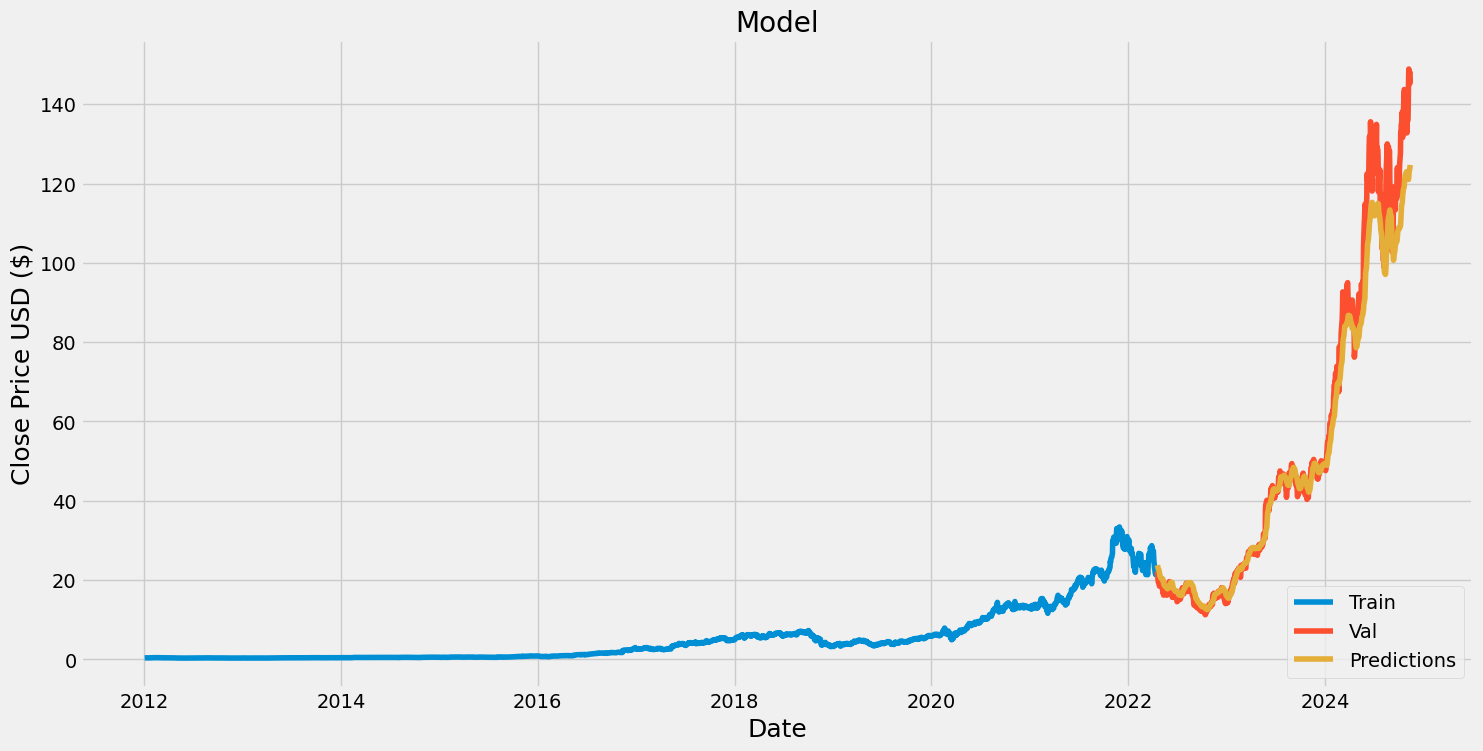

"\n# Filter the valid data for November 2024\nvalid_november = valid.loc['2024-10-01':'2024-11-30']\n\n# Shift predictions by one day ahead (to align it with the actual close price)\nvalid_november['Predictions'] = valid_november['Predictions'].shift(-1)\n\n# Plot the data\nplt.figure(figsize=(16,8))\nplt.title('Model - November 2024', fontsize=20)\nplt.xlabel('Date', fontsize=18)\nplt.ylabel('Close Price USD ($)', fontsize=18)\n\n# Plot the actual closing price and predicted closing prices for November 2024\nplt.plot(valid_november['Close'], label='Actual Close Price')\nplt.plot(valid_november['Predictions'], label='Predicted Close Price')\n\n# Add the legend\nplt.legend()\n\n# Show the plot\nplt.show()\n"

In [20]:
# plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions 
# visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc="lower right")
plt.show()


'''
# Filter the valid data for November 2024
valid_november = valid.loc['2024-10-01':'2024-11-30']

# Shift predictions by one day ahead (to align it with the actual close price)
valid_november['Predictions'] = valid_november['Predictions'].shift(-1)

# Plot the data
plt.figure(figsize=(16,8))
plt.title('Model - November 2024', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the actual closing price and predicted closing prices for November 2024
plt.plot(valid_november['Close'], label='Actual Close Price')
plt.plot(valid_november['Predictions'], label='Predicted Close Price')

# Add the legend
plt.legend()

# Show the plot
plt.show()
'''



In [21]:
# show the valid and predicted prices 
valid 

,Close,Predictions
Date,,
2022-04-19 00:00:00+00:00,22.198000,23.727266
2022-04-20 00:00:00+00:00,21.482000,23.430592
2022-04-21 00:00:00+00:00,20.183001,23.170593
2022-04-22 00:00:00+00:00,19.514999,22.825302
2022-04-25 00:00:00+00:00,19.902000,22.403576
...,...,...
2024-11-06 00:00:00+00:00,145.610001,121.023323
2024-11-07 00:00:00+00:00,148.880005,121.671608
2024-11-08 00:00:00+00:00,147.630005,122.816460


In [ ]:
# # # second cell

# get the quote 
apple_quote = yf.download('AAPL', start='2012-01-01', end='2024-11-15')

# multi index to one index (problem yfinance.download)
apple_quote.columns = apple_quote.columns.get_level_values(0)

apple_quote

# create a new dataframe 
new_df = apple_quote.filter(['Close'])

# get the last 60 day closing price values and convert the dataframe to an array 
last_60_days = new_df[-60:].values
# scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list 
X_test = []
# append the past 60 days 
X_test.append(last_60_days_scaled)
# convert the X_test data set to a numpy array 
X_test = np.array(X_test) 
# reshape the data 
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))
# get the predicted scaled price 
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price) 
print(pred_price)


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[221.62459]]


In [41]:

# get the quote 
apple_quote2 = yf.download('AAPL', start='2024-11-16', end='2024-11-16')

print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed

Ticker                      AAPL
Date                            
2024-11-15 00:00:00+00:00  225.0
